# **1er Problema**: ingesta de datos (datasets) en una sola ejecucion

### Importamos las librerias necesarias para ingesta de datos y visualizacion

In [3]:
import pandas as pd # para la estructura de nuestros datos
import datetime # para conversion de tipo en fechas
from google.colab import drive # importar nuestro almacenamiento virtual
import matplotlib.pyplot as plt # graficos
import os # directorios y demas
from prophet import Prophet # prediccion
import seaborn as sns # diagrama violin plot

### Variables

In [2]:
drive.mount('/content/drive') #
absolute_path='/content/drive/MyDrive/1.big_data_analytics/csv/'
files=os.listdir(absolute_path)
dataframes=[]

Mounted at /content/drive


### Almacenamiento de todos los csv en una variable

In [3]:
for i in files: # Inicializamos un bucle
  ingesta_csv=pd.read_csv(absolute_path+i, sep=';', encoding='latin-1') # Usamos panda y nuestro bucle para recorrer todos los ds
  ingesta_csv=ingesta_csv.rename(columns={ 'ï»¿anio': 'anio' }) # Renombramos
  ingesta_csv = ingesta_csv.drop(ingesta_csv.index[279:294]) # eliminamos columnas innecesarias
  dataframes.append(ingesta_csv) # Agregamos todos los datasets en una variable
embalses_total = pd.concat(dataframes, axis=1) # concatenamos y damos una separacion de 1 columna
embalses_total # Show me!

,anio,mes,hec_cub,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1998.0,enero,"23,891",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,febrero,"23,816",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,marzo,"23,245",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,abril,"23,35",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,mayo,"23,678",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,NaN,noviembre,"15,596",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,diciembre,"19,546",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,2021.0,enero,"23,477",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,NaN,febrero,"23,414",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **2do Problema**: Transformacion de los datos.

### Preparamos el dataset, eliminando:

1. Valores nulos.
1. Celdas vacias.
1. Comentarios.
1. Celdas para concatenar.

retiramos las columnas de año y mes y nos quedamos solo con dos indicativas de nuestro dataset

In [4]:
drop_empty = embalses_total.dropna(axis=1, how='all') # Eliminar columnas vacias
ano_mes = drop_empty.iloc[:, :2] # tomamos la columna 1,2 para retirarlas de nuestro df final
drop_column = [0, 1] # tomamos las columnas de año y mes
hec_cub = drop_empty.drop(drop_empty.columns[drop_column], axis=1) # almacenamos en una variable nuestro nuevo dataframe, borrando año y mes!
concat_dataframe = [ano_mes, hec_cub] # almacenamos en una lista
ingesta_csv = pd.concat(concat_dataframe, axis=1) # concatenamos nuestro nuevo dataset
ingesta_csv # Show me!

,anio,mes,hec_cub,hec_cub,hec_cub,hec_cub,hec_cub,hec_cub,hec_cub,hec_cub,hec_cub,hec_cub,hec_cub,hec_cub,hec_cub,hec_cub
0,1998.0,enero,"23,891","38,413","6,572","0,182","118,99","45,882","2,373","326,784","22,741","30,331","41,769","45,782","10,062","76,953"
1,NaN,febrero,"23,816","38,104","6,462","0,617","119,578","46,043","2,37","327,59","21,55","30,254","41,442","46,64","10,114","78,44"
2,NaN,marzo,"23,245","33,449","6,848","0,5","119,063","39,928","2,363","336,267","21,67","30,02","40,911","45,965","9,966","78,067"
3,NaN,abril,"23,35","27,848","6,747","0,639","119,578","42,443","2,363","353,267","21,644","31,674","44,173","46,209","10,326","82,716"
4,NaN,mayo,"23,678","23,009","7,041","0,625","120,833","49,165","2,338","391,448","21,925","35,518","50,395","43,954","10,989","85,453"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,NaN,noviembre,"15,596","32,256","4,354","0,307","83,256","26,556",NaN,"322,594","20,421","22,477","36,488","35,89","5,469","72,051"
275,NaN,diciembre,"19,546","33,851","5,248","0,321","96,598","45,859",NaN,"328,937","21,617","28,493","44,619","38,857","8,305","80,703"
276,2021.0,enero,"23,477","34,108","5,805","0,384","102,213","48,117",NaN,"332,906","23,6","29,557","49,209","43,689","8,811","84,763"
277,NaN,febrero,"23,414","34,477","6,134","0,351","117,166","45,471",NaN,"331,279","22,006","28,946","44,222","47,479","8,859","82,427"


### Usamos los nombres reales de nuestros embalses para identificarlos en nuestro dataset...

```python
"La Acena",
"Pedrezuela",
"La Jorosa",
"Navalmedio",
"Valmayor",
"El Vado",
"Los Morales",
"El Atazar",
"El Villar",
"La Pinilla",
"Puentes Viejas",
"Rio Sequillo",
"Navacerrada",
"Santillana"
```
Con esto nuestro dataset tendra una estructura mas organizada.



In [5]:
new_columns = ["anio", "mes", "La Acena", "Pedrezuela", "La Jorosa", "Navalmedio", "Valmayor", "El Vado", "Los Morales", "El Atazar", "El Villar", "La Pinilla", "Puentes Viejas", "Rio Sequillo" ,"Navacerrada", "Santillana"]
ingesta_csv.columns = new_columns # agregamos las nuevas columnas a nuestro dataset
ingesta_csv # Show me!

,anio,mes,La Acena,Pedrezuela,La Jorosa,Navalmedio,Valmayor,El Vado,Los Morales,El Atazar,El Villar,La Pinilla,Puentes Viejas,Rio Sequillo,Navacerrada,Santillana
0,1998.0,enero,"23,891","38,413","6,572","0,182","118,99","45,882","2,373","326,784","22,741","30,331","41,769","45,782","10,062","76,953"
1,NaN,febrero,"23,816","38,104","6,462","0,617","119,578","46,043","2,37","327,59","21,55","30,254","41,442","46,64","10,114","78,44"
2,NaN,marzo,"23,245","33,449","6,848","0,5","119,063","39,928","2,363","336,267","21,67","30,02","40,911","45,965","9,966","78,067"
3,NaN,abril,"23,35","27,848","6,747","0,639","119,578","42,443","2,363","353,267","21,644","31,674","44,173","46,209","10,326","82,716"
4,NaN,mayo,"23,678","23,009","7,041","0,625","120,833","49,165","2,338","391,448","21,925","35,518","50,395","43,954","10,989","85,453"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,NaN,noviembre,"15,596","32,256","4,354","0,307","83,256","26,556",NaN,"322,594","20,421","22,477","36,488","35,89","5,469","72,051"
275,NaN,diciembre,"19,546","33,851","5,248","0,321","96,598","45,859",NaN,"328,937","21,617","28,493","44,619","38,857","8,305","80,703"
276,2021.0,enero,"23,477","34,108","5,805","0,384","102,213","48,117",NaN,"332,906","23,6","29,557","49,209","43,689","8,811","84,763"
277,NaN,febrero,"23,414","34,477","6,134","0,351","117,166","45,471",NaN,"331,279","22,006","28,946","44,222","47,479","8,859","82,427"


### Identificamos los tipo de nuestros valores en el dataset y cambiamos los tipos a float para sumarlos posteriormente y aquellos valores como el año lo transformamos a integer ya que no necesitamos decimales en ellos!

In [6]:
ingesta_csv.dtypes # consultamos los tipos que tenemos en nuestro dataframe

anio              float64
mes                object
La Acena           object
Pedrezuela         object
La Jorosa          object
Navalmedio         object
Valmayor           object
El Vado            object
Los Morales        object
El Atazar          object
El Villar          object
La Pinilla         object
Puentes Viejas     object
Rio Sequillo       object
Navacerrada        object
Santillana         object
dtype: object

In [7]:
columnas = ingesta_csv.columns.values # cambiamos el tipo de dato a float
for i in columnas[2:]: # iteramos a partir de la 3ra columna
  ingesta_csv[i] = ingesta_csv[i].str.replace(',', '.') # reemplazamos , por .
  ingesta_csv[i] = ingesta_csv[i].str.replace(' ', '0') # reemplazamos espacios vacios por 0
ingesta_csv = ingesta_csv.fillna(0) # reemplaza valores nulos por 0
ingesta_csv = ingesta_csv.astype(float, errors='ignore') # mantiene el dato original en caso de  error
ingesta_csv['anio'] = ingesta_csv['anio'].astype(int) # remplazamos el tipo de anio
# ingesta_csv.head(12) # Show me!
# ingesta_csv.to_csv("/content/drive/MyDrive/1.big_data_analytics/nuevo_dataset.csv", index=False)

### identificamos el tipo de nuestros embalses

In [8]:
ingesta_csv.dtypes # verificamos los tipos, siendo ahora valores float

anio                int64
mes                object
La Acena          float64
Pedrezuela        float64
La Jorosa         float64
Navalmedio        float64
Valmayor          float64
El Vado           float64
Los Morales       float64
El Atazar         float64
El Villar         float64
La Pinilla        float64
Puentes Viejas    float64
Rio Sequillo      float64
Navacerrada       float64
Santillana        float64
dtype: object

In [9]:
ingesta_csv['anio'] = ingesta_csv['anio'].replace(0, method='ffill') # reemplazamos los valores nulos en la columna anio por los años (formato numerico)
ingesta_csv # Show me!

,anio,mes,La Acena,Pedrezuela,La Jorosa,Navalmedio,Valmayor,El Vado,Los Morales,El Atazar,El Villar,La Pinilla,Puentes Viejas,Rio Sequillo,Navacerrada,Santillana
0,1998,enero,23.891,38.413,6.572,0.182,118.990,45.882,2.373,326.784,22.741,30.331,41.769,45.782,10.062,76.953
1,1998,febrero,23.816,38.104,6.462,0.617,119.578,46.043,2.370,327.590,21.550,30.254,41.442,46.640,10.114,78.440
2,1998,marzo,23.245,33.449,6.848,0.500,119.063,39.928,2.363,336.267,21.670,30.020,40.911,45.965,9.966,78.067
3,1998,abril,23.350,27.848,6.747,0.639,119.578,42.443,2.363,353.267,21.644,31.674,44.173,46.209,10.326,82.716
4,1998,mayo,23.678,23.009,7.041,0.625,120.833,49.165,2.338,391.448,21.925,35.518,50.395,43.954,10.989,85.453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2020,noviembre,15.596,32.256,4.354,0.307,83.256,26.556,0.000,322.594,20.421,22.477,36.488,35.890,5.469,72.051
275,2020,diciembre,19.546,33.851,5.248,0.321,96.598,45.859,0.000,328.937,21.617,28.493,44.619,38.857,8.305,80.703
276,2021,enero,23.477,34.108,5.805,0.384,102.213,48.117,0.000,332.906,23.600,29.557,49.209,43.689,8.811,84.763
277,2021,febrero,23.414,34.477,6.134,0.351,117.166,45.471,0.000,331.279,22.006,28.946,44.222,47.479,8.859,82.427


### Creamos una columa de total, que nos muestra el total por año y mes de nuestro dataset. Ademas realizamos un nuevo dataset que contiene solo valores de clave valor de la fecha y un total por mes de todos embalses.

In [10]:
ingesta_csv.iloc[:, 2:] = ingesta_csv.iloc[:, 2:].astype(float) # Seleccionamos las filas a partir de la 3era columna y convertimos en float
ingesta_csv['total'] = ingesta_csv.iloc[:, 2:].sum(axis=1) # creamos una nueva columna llamada total
ingesta_csv # Show me!

,anio,mes,La Acena,Pedrezuela,La Jorosa,Navalmedio,Valmayor,El Vado,Los Morales,El Atazar,El Villar,La Pinilla,Puentes Viejas,Rio Sequillo,Navacerrada,Santillana,total
0,1998,enero,23.891,38.413,6.572,0.182,118.990,45.882,2.373,326.784,22.741,30.331,41.769,45.782,10.062,76.953,790.725
1,1998,febrero,23.816,38.104,6.462,0.617,119.578,46.043,2.370,327.590,21.550,30.254,41.442,46.640,10.114,78.440,793.020
2,1998,marzo,23.245,33.449,6.848,0.500,119.063,39.928,2.363,336.267,21.670,30.020,40.911,45.965,9.966,78.067,788.262
3,1998,abril,23.350,27.848,6.747,0.639,119.578,42.443,2.363,353.267,21.644,31.674,44.173,46.209,10.326,82.716,812.977
4,1998,mayo,23.678,23.009,7.041,0.625,120.833,49.165,2.338,391.448,21.925,35.518,50.395,43.954,10.989,85.453,866.371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2020,noviembre,15.596,32.256,4.354,0.307,83.256,26.556,0.000,322.594,20.421,22.477,36.488,35.890,5.469,72.051,677.715
275,2020,diciembre,19.546,33.851,5.248,0.321,96.598,45.859,0.000,328.937,21.617,28.493,44.619,38.857,8.305,80.703,752.954
276,2021,enero,23.477,34.108,5.805,0.384,102.213,48.117,0.000,332.906,23.600,29.557,49.209,43.689,8.811,84.763,786.639
277,2021,febrero,23.414,34.477,6.134,0.351,117.166,45.471,0.000,331.279,22.006,28.946,44.222,47.479,8.859,82.427,792.231


### sustituimos los valores object mes por valores numericos, con una diccionario clave valor!

In [11]:
df_anual = ingesta_csv.iloc[:, [0, 1, -1]].copy() # creamos una copia de nuestro dataset total
meses = { # creamos un diccionario clave valor, almacenamos mes y su valor numerico.
    'enero': 1,
    'febrero': 2,
    'marzo': 3,
    'abril': 4,
    'mayo': 5,
    'junio': 6,
    'julio': 7,
    'agosto': 8,
    'septiembre': 9,
    'octubre': 10,
    'noviembre': 11,
    'diciembre': 12
}
df_anual['fecha'] = pd.to_datetime(df_anual['anio'].astype(str) + '-' + df_anual['mes'].map(meses).astype(str)) # lo convertimos a tipo date
df_anual = df_anual.drop(['anio', 'mes'], axis=1) # eliminamos las columnas mes y anio
df_anual.head(12) # Show me

,total,fecha
0,790.725,1998-01-01
1,793.020,1998-02-01
2,788.262,1998-03-01
3,812.977,1998-04-01
4,866.371,1998-05-01
5,839.113,1998-06-01
6,781.100,1998-07-01
7,728.206,1998-08-01
8,681.012,1998-09-01
9,643.493,1998-10-01


# **3er Problema**: Visualizacion de los dataset

### Grafico de barras por año de todos los embalses usando matplotlib.pyplot

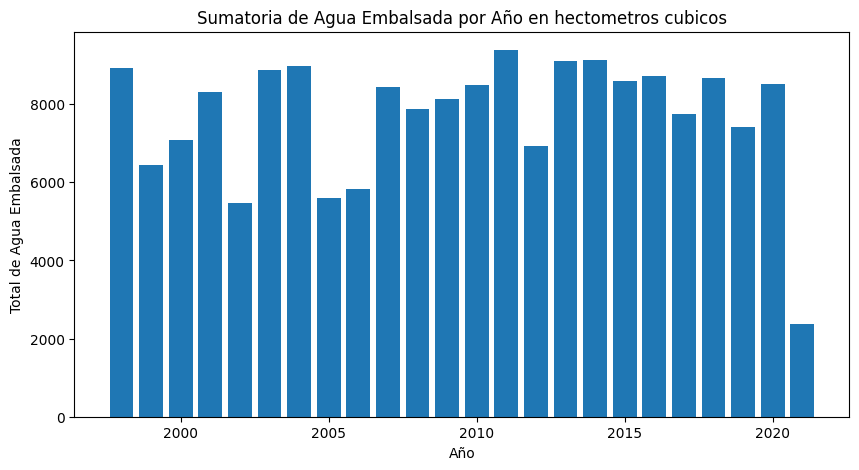

In [12]:
df_anual['fecha'] = pd.to_datetime(df_anual['fecha']) # convertimos a tipo datatime
df_anual['anio'] = df_anual['fecha'].dt.year # creamos una nueva columna llamado año
df_suma_anual = df_anual.groupby('anio')['total'].sum().reset_index() # agrupamos y sumamos
plt.figure(figsize=(10, 5)) # elegimos el tamaño de nuestras axis
plt.bar(df_suma_anual['anio'], df_suma_anual['total']) # elegimos las columnas a graficar
plt.title('Sumatoria de Agua Embalsada por Año en hectometros cubicos') # Titulo
plt.xlabel('Año') # nombre eje x
plt.ylabel('Total de Agua Embalsada') # nombre eje y
plt.show() # Show me!

### Graficos Violin

<ipython-input-13-4216249c9cd4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='anio', y='total', data=df_anual, palette='viridis') # Creamos un grafico tipo violin


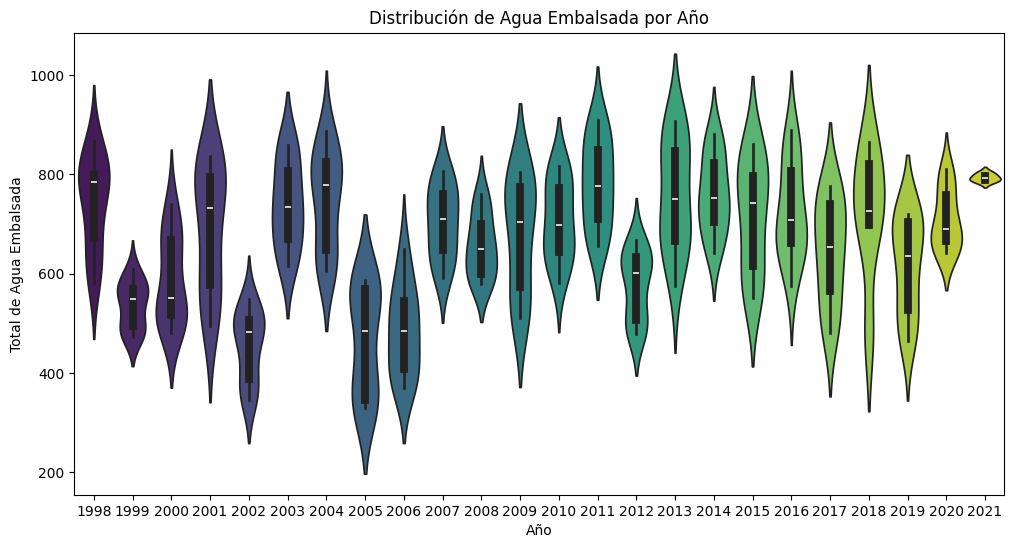

In [13]:
df_anual['fecha'] = pd.to_datetime(df_anual['fecha']) # convertimos la columna fecha en datatime
df_anual['anio'] = df_anual['fecha'].dt.year # creamos una nueva columna anio de fecha
plt.figure(figsize=(12, 6))  # indicamos el tamaño
sns.violinplot(x='anio', y='total', data=df_anual, palette='viridis') # Creamos un grafico tipo violin
plt.title('Distribución de Agua Embalsada por Año') # Titulo
plt.xlabel('Año') # Eje X año
plt.ylabel('Total de Agua Embalsada') # Eje Y Total de agua embalsada
plt.show() # Show me!

# **4to Problema**: Prediccion con prophet.


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptqh4q_dt/lkvrzkrl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptqh4q_dt/n97hkv8y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69538', 'data', 'file=/tmp/tmptqh4q_dt/lkvrzkrl.json', 'init=/tmp/tmptqh4q_dt/n97hkv8y.json', 'output', 'file=/tmp/tmptqh4q_dt/prophet_modelcdm604sz/prophet_model-20240117211813.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:18:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:18:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


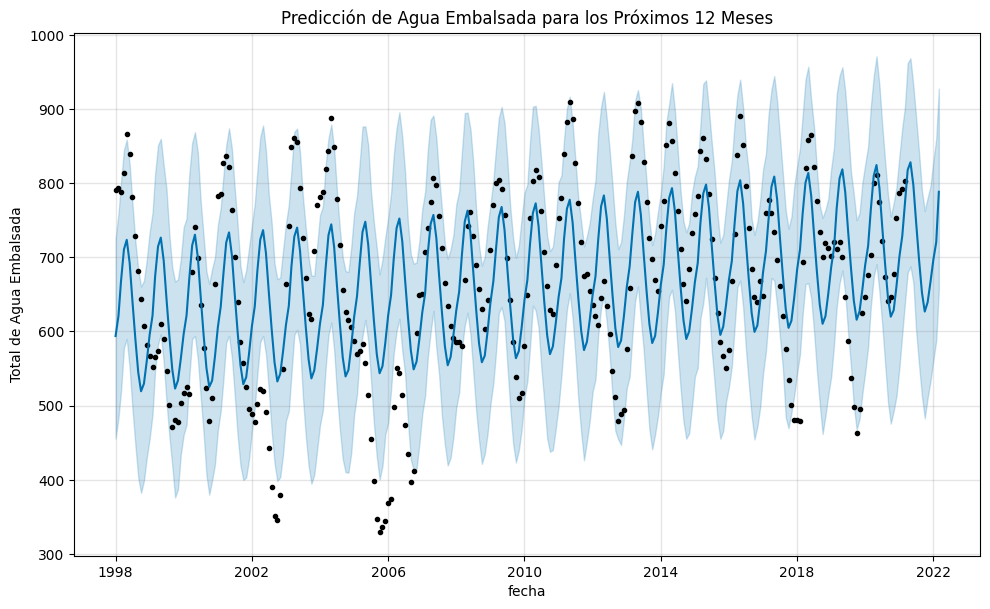

In [15]:
df_anual['fecha'] = pd.to_datetime(df_anual['fecha']) # convertimos a datatime
df_prophet = df_anual[['fecha', 'total']].rename(columns={'fecha': 'ds', 'total': 'y'}) # seleccionamos y renombramos las columnas
modelo_prophet = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1) # creamos un objeto prophet
modelo_prophet.fit(df_prophet) # entrenamos el modelo
futuro = modelo_prophet.make_future_dataframe(periods=12, freq='M') # creamos un dataframe con las nuevas fechas 12 meses
prediccion = modelo_prophet.predict(futuro) # realizamos la prediccion
fig = modelo_prophet.plot(prediccion) # Visualizamos
plt.title('Predicción de Agua Embalsada para los Próximos 12 Meses') # titulo
plt.xlabel('fecha') # titulo eje X
plt.ylabel('Total de Agua Embalsada') # Titulo eje Y
plt.show() # Show me!

In [16]:
prediccion.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
279,2021-03-31,718.616935,679.129022,961.716573,718.616935,718.616935,99.059067,99.059067,99.059067,99.059067,99.059067,99.059067,0.0,0.0,0.0,817.676002
280,2021-04-30,719.037346,687.649363,968.241378,719.037346,719.037346,109.094584,109.094584,109.094584,109.094584,109.094584,109.094584,0.0,0.0,0.0,828.131929
281,2021-05-31,719.471771,665.604985,931.285000,719.469728,719.473860,77.687942,77.687942,77.687942,77.687942,77.687942,77.687942,0.0,0.0,0.0,797.159712
282,2021-06-30,719.892182,600.473912,887.713461,719.886970,719.897816,26.458004,26.458004,26.458004,26.458004,26.458004,26.458004,0.0,0.0,0.0,746.350186
283,2021-07-31,720.326606,554.687608,841.030931,720.317135,720.336089,-23.718980,-23.718980,-23.718980,-23.718980,-23.718980,-23.718980,0.0,0.0,0.0,696.607627
284,2021-08-31,720.761031,512.535451,789.970611,720.746125,720.775205,-68.302411,-68.302411,-68.302411,-68.302411,-68.302411,-68.302411,0.0,0.0,0.0,652.458620
285,2021-09-30,721.181442,482.734823,762.606922,721.160900,721.203581,-94.362892,-94.362892,-94.362892,-94.362892,-94.362892,-94.362892,0.0,0.0,0.0,626.818550
286,2021-10-31,721.615867,510.557038,780.137311,721.587317,721.645021,-82.235613,-82.235613,-82.235613,-82.235613,-82.235613,-82.235613,0.0,0.0,0.0,639.380254
287,2021-11-30,722.036278,532.528806,795.530325,722.001727,722.071889,-55.738702,-55.738702,-55.738702,-55.738702,-55.738702,-55.738702,0.0,0.0,0.0,666.297576
288,2021-12-31,722.470703,560.632317,829.158442,722.429617,722.517762,-25.973409,-25.973409,-25.973409,-25.973409,-25.973409,-25.973409,0.0,0.0,0.0,696.497293


# FINAL ETL (SIN GRAFICOS)

In [4]:
def final_etl():
    drive.mount('/content/drive') #
    absolute_path='/content/drive/MyDrive/1.big_data_analytics/csv/'
    files=os.listdir(absolute_path)
    dataframes=[]
    for i in files: # Inicializamos un bucle
        ingesta_csv=pd.read_csv(absolute_path+i, sep=';', encoding='latin-1') # Usamos panda y nuestro bucle para recorrer todos los ds
        ingesta_csv=ingesta_csv.rename(columns={ 'ï»¿anio': 'anio' }) # Renombramos
        ingesta_csv = ingesta_csv.drop(ingesta_csv.index[279:294]) # eliminamos columnas innecesarias
        dataframes.append(ingesta_csv) # Agregamos todos los datasets en una variable
    embalses_total = pd.concat(dataframes, axis=1) # concatenamos y damos una separacion de 1 columna
    drop_empty = embalses_total.dropna(axis=1, how='all') # Eliminar columnas vacias
    ano_mes = drop_empty.iloc[:, :2] # tomamos la columna 1,2 para retirarlas de nuestro df final
    drop_column = [0, 1] # tomamos las columnas de año y mes
    hec_cub = drop_empty.drop(drop_empty.columns[drop_column], axis=1) # almacenamos en una variable nuestro nuevo dataframe, borrando año y mes!
    concat_dataframe = [ano_mes, hec_cub] # almacenamos en una lista
    ingesta_csv = pd.concat(concat_dataframe, axis=1) # concatenamos nuestro nuevo dataset
    new_columns = ["anio", "mes", "La Acena", "Pedrezuela", "La Jorosa", "Navalmedio", "Valmayor", "El Vado", "Los Morales", "El Atazar", "El Villar", "La Pinilla", "Puentes Viejas", "Rio Sequillo" ,"Navacerrada", "Santillana"]
    ingesta_csv.columns = new_columns # agregamos las nuevas columnas a nuestro dataset
    columnas = ingesta_csv.columns.values # cambiamos el tipo de dato a float
    for i in columnas[2:]: # iteramos a partir de la 3ra columna
        ingesta_csv[i] = ingesta_csv[i].str.replace(',', '.') # reemplazamos , por .
        ingesta_csv[i] = ingesta_csv[i].str.replace(' ', '0') # reemplazamos espacios vacios por 0
    ingesta_csv = ingesta_csv.fillna(0) # reemplaza valores nulos por 0
    ingesta_csv = ingesta_csv.astype(float, errors='ignore') # mantiene el dato original en caso de  error
    ingesta_csv['anio'] = ingesta_csv['anio'].astype(int) # remplazamos el tipo de anio
    ingesta_csv['anio'] = ingesta_csv['anio'].replace(0, method='ffill') # reemplazamos los valores nulos en la columna anio por los años (formato numerico)
    ingesta_csv.iloc[:, 2:] = ingesta_csv.iloc[:, 2:].astype(float) # Seleccionamos las filas a partir de la 3era columna y convertimos en float
    ingesta_csv['total'] = ingesta_csv.iloc[:, 2:].sum(axis=1) # creamos una nueva columna llamada total
    df_anual = ingesta_csv.iloc[:, [0, 1, -1]].copy() # creamos una copia de nuestro dataset total
    meses = { # creamos un diccionario clave valor, almacenamos mes y su valor numerico.
        'enero': 1,
        'febrero': 2,
        'marzo': 3,
        'abril': 4,
        'mayo': 5,
        'junio': 6,
        'julio': 7,
        'agosto': 8,
        'septiembre': 9,
        'octubre': 10,
        'noviembre': 11,
        'diciembre': 12
    }
    df_anual['fecha'] = pd.to_datetime(df_anual['anio'].astype(str) + '-' + df_anual['mes'].map(meses).astype(str)) # lo convertimos a tipo date
    df_anual = df_anual.drop(['anio', 'mes'], axis=1) # eliminamos las columnas mes y anio
    return df_anual # retorna el valor de la funcion en el resultado de df_anual

df_anual_pred=final_etl() # almacenamos la funcion en una variable
df_anual_pred # Show me!

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,total,fecha
0,790.725,1998-01-01
1,793.020,1998-02-01
2,788.262,1998-03-01
3,812.977,1998-04-01
4,866.371,1998-05-01
...,...,...
274,677.715,2020-11-01
275,752.954,2020-12-01
276,786.639,2021-01-01
277,792.231,2021-02-01
